In [52]:
# Import all packages needed
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import json
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [53]:
# Import style.json
style_path: Path = Path.cwd().parent / 'style' / 'style.json'
with open(style_path, 'r') as f: # opens the style.json file
    style: dict = json.load(f) # loads as a dictionary object

In [54]:
# Loading Data (data file must be in the same directory as jupyter notebook)
# Import data from excel file
# TODO: replace filename with the name of your data file
raw_data_filename: str ='2024_01_19 Stanley data.xlsx'

# Tell program to read the data
raw_data: pd.DataFrame = pd.read_excel(raw_data_filename, skiprows=[0,1]) # read data into a pandas dataframe and skip the first row since it is unnecessary

# Output data
raw_data

,X:,Y:,X:.1,Y:.1,Unnamed: 4,X:.2,Y:.2,X:.3,Y:.3,Unnamed: 9,X:.4,Y:.4,X:.5,Y:.5
0,0.00000,-0.011,0.00000,9.0,NaN,0.00000,0.011,0.00000,9.0,NaN,0.00000,-0.003,0.00000,9.0
1,0.00167,-0.013,0.00167,9.0,NaN,0.00167,0.008,0.00167,9.0,NaN,0.00167,-0.003,0.00167,9.0
2,0.00333,-0.008,0.00333,9.0,NaN,0.00333,-0.002,0.00333,9.0,NaN,0.00333,-0.003,0.00333,9.0
3,0.00500,0.002,0.00500,9.0,NaN,0.00500,-0.014,0.00500,9.0,NaN,0.00500,-0.003,0.00500,9.0
4,0.00667,0.006,0.00667,9.0,NaN,0.00667,-0.030,0.00667,9.0,NaN,0.00667,-0.003,0.00667,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,14.99333,0.007,14.99333,0.0,NaN,14.99333,-0.005,14.99333,0.0,NaN,14.99333,0.002,14.99333,0.0
8997,14.99500,0.006,14.99500,0.0,NaN,14.99500,-0.008,14.99500,0.0,NaN,14.99500,0.007,14.99500,0.0
8998,14.99667,0.001,14.99667,0.0,NaN,14.99667,-0.008,14.99667,0.0,NaN,14.99667,-0.002,14.99667,0.0
8999,14.99833,-0.005,14.99833,0.0,NaN,14.99833,-0.002,14.99833,0.0,NaN,14.99833,-0.010,14.99833,0.0


In [55]:
# Data preprocessing specific to UV-Vis
#TODO: baseline correction?
def preprocess(data: pd.DataFrame, normalize: bool = False):
    """Function that applies transformation to the dataframe which will make it ready for plotting. Note, this is specific to UV-Vis.
    """
    # Rename column names
    data = data.rename(columns={data.columns[0]: "Time (min)", data.columns[1]: "SCF3-PS", data.columns[5]: "001G_x", data.columns[6]:"PS"}) # rename the first column to Time, and the second column to Refractive Index

    # Normalize refractive index
    # in data, get all columns with _y
    for col in data.columns:
        if "PS" in col:
            max_val: float = data[col].max() # get the maximum value of the absorbance column
            data[col] = data[col] / max_val # divide all values in the absorbance column by the maximum value to normalize the data

    # melt dataframe
    data = data.melt(id_vars=["Time (min)"], value_vars=["SCF3-PS", "PS"], value_name="Refractive Index") # melt the dataframe so that it is in long form
    return data

preprocessed_data: pd.DataFrame = preprocess(raw_data) # preprocess the data using the function defined above
preprocessed_data

,Time (min),variable,Refractive Index
0,0.00000,SCF3-PS,-0.000469
1,0.00167,SCF3-PS,-0.000555
2,0.00333,SCF3-PS,-0.000341
3,0.00500,SCF3-PS,0.000085
4,0.00667,SCF3-PS,0.000256
...,...,...,...
17997,14.99333,PS,-0.000253
17998,14.99500,PS,-0.000405
17999,14.99667,PS,-0.000405
18000,14.99833,PS,-0.000101


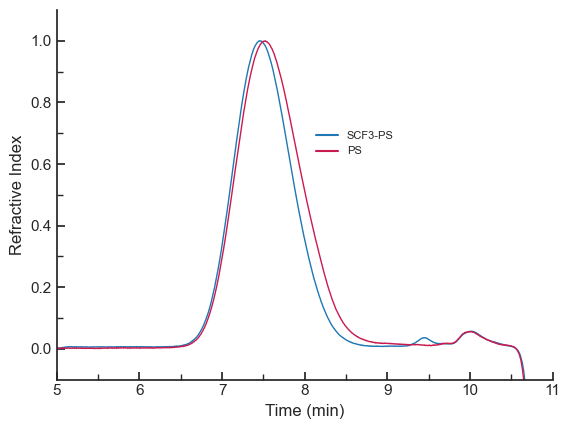

In [60]:
# Plot the data!
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data[preprocessed_data['variable']=="SCF3-PS"], # refers to the dataframe
    x="Time (min)", # refers to column header to get all the X data
    y="Refractive Index", # refers to column header to get all the Y data
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
    hue="variable",
)

graph = sns.lineplot(
    data=preprocessed_data[preprocessed_data['variable']=="PS"], # refers to the dataframe
    x="Time (min)", # refers to column header to get all the X data
    y="Refractive Index", # refers to column header to get all the Y data
    palette="rocket_r",
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
    hue="variable",
)

sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=8, # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X-axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y-axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(5, 11)
# NOTE: User can change the y limits here
plt.ylim(-0.1, 1.1)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("GPC_005P_vs_001G.svg", dpi=300, bbox_inches="tight")
plt.savefig("GPC_005P_vs_001G.jpg", dpi=300, bbox_inches="tight")